# Algebraic Solution for Linear Programming

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mpl_config

$$
A_{ub}x\le b_{ub}
$$

In [2]:
# upper bound matrix
A_ub = np.array([
    [20, 30],
    [5, 4],
    [-1, 0],
    [0, -1],
])
# upper bound vector
b_ub = np.array([690, 120, 0, 0])
# coefficients for the objective function
c = np.array([25, 30])

## Find out all intersection points

In [3]:
from itertools import combinations
import scipy

In [4]:
intersections = []
for i, j in combinations(range(len(A_ub)), 2):
    A = A_ub[[i, j]]
    b = b_ub[[i, j]]
    intersections.append(scipy.linalg.solve(A, b))
intersections = np.array(intersections)

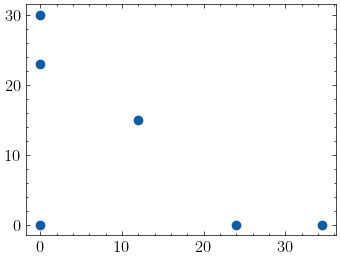

In [5]:
plt.scatter(intersections[:, 0], intersections[:, 1])

Problems
- How many systems of equations do we have to solve? What is the size of the systems of equations? 
- What if there are linear dependencies in the constraints?

## Determine if the intersection points are feasible

In [6]:
satisfied = (A_ub @ intersections.T) <= b_ub.reshape(-1, 1)
# row: contrains. col: intersection points
satisfied

array([[ True,  True,  True, False,  True,  True],
       [ True,  True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [7]:
is_feasible = np.all(satisfied, axis=0)
is_feasible

array([ True,  True, False, False,  True,  True])

Problems
- Do you like the vectorized implementation? What are the pros and cons?

## Evaluate the intersection points

In [8]:
opt_xy = None
opt_obj = 0
for i, x in enumerate(intersections):
    if not is_feasible[i]:
        continue
    obj = c @ x
    print(x, obj)
    if obj > opt_obj:
        opt_obj = obj
        opt_xy = x

[12. 15.] 750.0
[ 0. 23.] 690.0
[24. -0.] 600.0
[-0. -0.] 0.0


In [9]:
opt_xy, opt_obj

(array([12., 15.]), 750.0)

Problems
- Can you come up with a vectorized implementation?